# 모델 저장과 콜백
- 학습시킨 모델을 저장하고 관리하는 것은 모델 관리, 더 나아가 MLOps(데이터 수집부터 모델 학습, 서비스 배포까지를 포함하는 시스템)의 시작점

### MNIST 딥러닝 모델 예제

- keras.datasets에 기본으로 포함


#### 모듈 임포트

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models, layers, utils

#### 데이터 로드 및 전처리

In [2]:
from tensorflow.keras.datasets import mnist
from sklearn.model_selection import train_test_split

(x_train_full, y_train_full), (x_test, y_test) = mnist.load_data(path='mnist.npz')
# MNIST(Mixed National Institute of Standards and Technology database) 데이터셋을 저장하고 있는 넘파이(Numpy) 압축 파일

x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full,
                                                  test_size=0.3,
                                                  random_state=123)
#  y_test의 경우에는 0부터 9까지의 숫자를 나타내는 레이블


print(f"전체 학습 데이터: {x_train_full.shape}  레이블: {y_train_full.shape}")
print(f"학습용 데이터: {x_train.shape}  레이블: {y_train.shape}")
print(f"검증용 데이터: {x_val.shape}  레이블: {y_val.shape}")
print(f"테스트용 데이터: {x_test.shape}  레이블: {y_test.shape}")

11501568/11490434 [==============================] - 0s 0us/step
전체 학습 데이터: (60000, 28, 28)  레이블: (60000,)
학습용 데이터: (42000, 28, 28)  레이블: (42000,)
검증용 데이터: (18000, 28, 28)  레이블: (18000,)
테스트용 데이터: (10000, 28, 28)  레이블: (10000,)


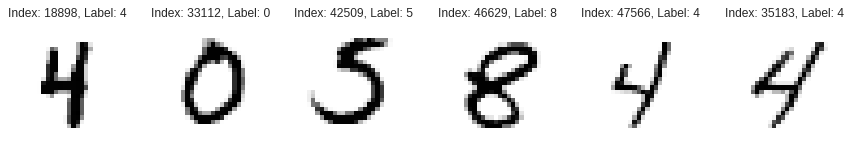

In [3]:
# 실제 숫자 이미지가 어떻게 구성되어 있는지 60,000개 중에서 6개만 랜덤으로 x_train_full과 y_train_full에서 추출하여 표시
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn-white")

num_sample = 6
random_idxs = np.random.randint(60000, size=num_sample)

plt.figure(figsize=(15, 3))
for i, idx in enumerate(random_idxs):
    img = x_train_full[idx, :]
    label = y_train_full[idx]
    
    plt.subplot(1, len(random_idxs), i+1)
    plt.axis('off')
    plt.title(f'Index: {idx}, Label: {label}')
    plt.imshow(img)

In [4]:
print(y_train[0])

4


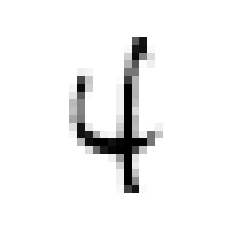

In [5]:
img = x_train[0, :]
plt.axis('off')
plt.imshow(img)

In [6]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 184 236
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  13 235 240
   11   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  73 244 144
   59   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 104 186   6
   32   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  33  21   0   0   0   0 15

In [7]:
# 간단한 전처리
x_train = x_train / 255.
x_val = x_val / 255.
x_test = x_test / 255.

# one-hot encoding형식으로 표현 # 정답에는 1을, 나머지의 값은 0
y_train = utils.to_categorical(y_train)
y_val = utils.to_categorical(y_val)
y_test = utils.to_categorical(y_test)

print(y_train[0])
print(y_val[0])
print(y_test[0])

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


#### 모델 구성
- MNIST 데이터셋의 숫자 이미지가 28 x 28 사이즈를 사용하므로 입력 객체로 keras.Input를 사용할 때, shape을 (28, 28)로 지정
- layers.Flatten 레이어를 사용하여 입력 데이터 모양이 2차원인 28 x 28 크기를 1차원으로 784 크기를 갖도록 변형
- MNIST의 숫자가 0부터 9까지 총 10개 이므로 마지막 레이어에서는 전체 카테고리의 수인 10을 유닛수로 지정
- 활성화 함수는 softmax를 사용하여 각 카테고리별 확률 값을 구함

In [8]:
model = models.Sequential()
model.add(keras.Input(shape=(28, 28), name='input'))
model.add(layers.Flatten(input_shape=[28, 28], name='flatten'))
model.add(layers.Dense(100, activation='relu', name='dense1'))
model.add(layers.Dense(64, activation='relu', name='dense2'))
model.add(layers.Dense(32, activation='relu', name='dense3'))
model.add(layers.Dense(10, activation='softmax', name='output'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense1 (Dense)               (None, 100)               78500     
_________________________________________________________________
dense2 (Dense)               (None, 64)                6464      
_________________________________________________________________
dense3 (Dense)               (None, 32)                2080      
_________________________________________________________________
output (Dense)               (None, 10)                330       
Total params: 87,374
Trainable params: 87,374
Non-trainable params: 0
_________________________________________________________________


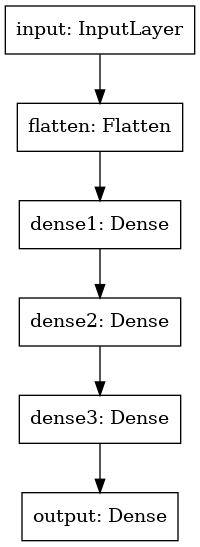

In [9]:
utils.plot_model(model)

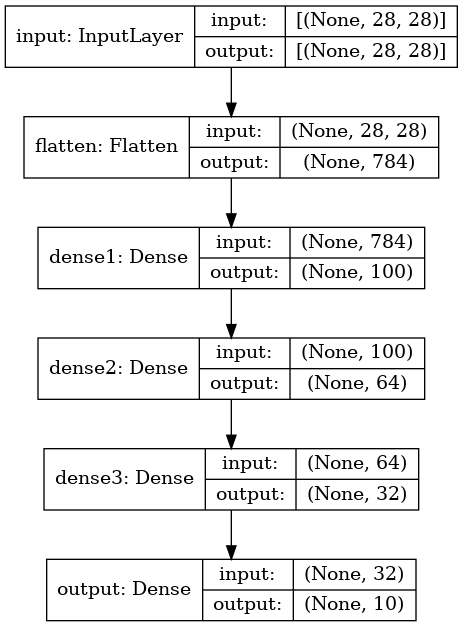

In [10]:
utils.plot_model(model, show_shapes=True)

#### 모델 컴파일 및 학습
- 손실 함수로는 다중 분류로 클래스가 원-핫 인코딩 방식으로 되어 있을 때 사용하는 categorical_crossentropy를 지정
- 옵티마이저는 가장 기본적인 sgd을 지정
- 분류에 대한 성능을 확인하기 위한 지표로 accuracy를 지정

In [11]:
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

In [12]:
#  각 에폭마다 지표 결과들을 history로 저장
history = model.fit(x_train, y_train,
                    epochs=50,
                    batch_size=128,
                    validation_data=(x_val, y_val))

Epoch 1/50
329/329 [==============================] - 2s 4ms/step - loss: 1.8828 - accuracy: 0.4287 - val_loss: 1.2572 - val_accuracy: 0.7151
Epoch 2/50
329/329 [==============================] - 1s 3ms/step - loss: 0.7928 - accuracy: 0.8091 - val_loss: 0.5605 - val_accuracy: 0.8492
Epoch 3/50
329/329 [==============================] - 1s 3ms/step - loss: 0.4764 - accuracy: 0.8685 - val_loss: 0.4316 - val_accuracy: 0.8759
Epoch 4/50
329/329 [==============================] - 1s 3ms/step - loss: 0.3911 - accuracy: 0.8898 - val_loss: 0.3758 - val_accuracy: 0.8909
Epoch 5/50
329/329 [==============================] - 1s 3ms/step - loss: 0.3488 - accuracy: 0.9003 - val_loss: 0.3422 - val_accuracy: 0.8986
Epoch 6/50
329/329 [==============================] - 1s 3ms/step - loss: 0.3218 - accuracy: 0.9078 - val_loss: 0.3210 - val_accuracy: 0.9044
Epoch 7/50
329/329 [==============================] - 1s 3ms/step - loss: 0.3018 - accuracy: 0.9136 - val_loss: 0.3027 - val_accuracy: 0.9101
Epoch 

In [13]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

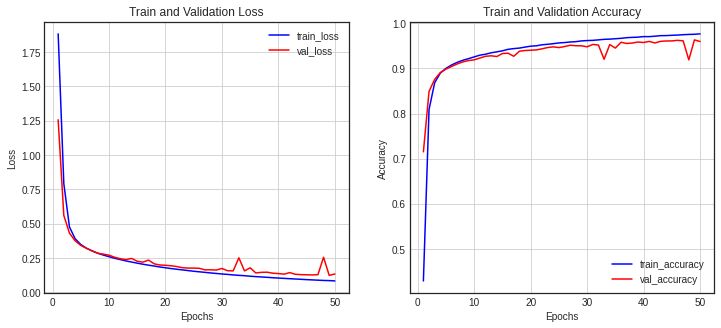

In [14]:
history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color='blue', label='train_loss')
ax1.plot(epochs, val_loss, color='red', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, color='blue', label='train_accuracy')
ax2.plot(epochs, val_accuracy, color='red', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

#### 모델 평가 및 예측


In [15]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1337 - accuracy: 0.9581


[0.13373920321464539, 0.9581000208854675]

In [16]:
pred_ys = model.predict(x_test)
print(pred_ys.shape)
print(pred_ys[0])

(10000, 10)
[4.5275301e-06 2.1928224e-06 1.6917514e-04 1.8696112e-04 4.4033808e-07
 5.6058466e-06 1.2916811e-09 9.9961108e-01 1.8290293e-06 1.8145527e-05]


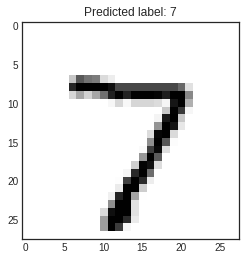

In [17]:
# 결과값 중에서 가장 큰 수가 있는 위치값을 np.argmax()를 통해서 구하고,
# 예측한 레이블 값 arg_pred_y[0]과 실제 숫자 이미지인 x_test[0]를 출력

arg_pred_y = np.argmax(pred_ys, axis=1)

plt.title(f'Predicted label: {arg_pred_y[0]}')
plt.imshow(x_test[0])
plt.show()

In [18]:
# 성능 확인
from sklearn.metrics import classification_report

print(classification_report(np.argmax(y_test, axis=-1), np.argmax(pred_ys, axis=-1)))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97       980
           1       0.98      0.99      0.99      1135
           2       0.95      0.96      0.96      1032
           3       0.95      0.97      0.96      1010
           4       0.92      0.98      0.95       982
           5       0.96      0.94      0.95       892
           6       0.95      0.97      0.96       958
           7       0.95      0.96      0.96      1028
           8       0.96      0.95      0.95       974
           9       0.99      0.88      0.93      1009

    accuracy                           0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000



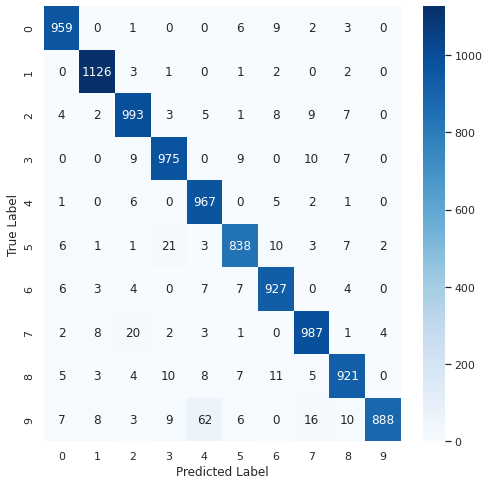

In [19]:
# confusion matrix 시각화
from sklearn.metrics import confusion_matrix
import seaborn as sns
sns.set(style='white')

plt.figure(figsize=(8, 8))
cm = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(pred_ys, axis=-1))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## 모델 저장과 로드
- 모델을 열심히 학습시키고 저장을 안한다면 다시 처음부터 학습을 해야함
- 어느 정도 학습이 되었다면 추후에 모델을 사용하기 위해서 저장해야 함 
- 모델을 저장할 때는 `save()` 함수를 사용
- 모델을 불러올 때는 `load_model()` 함수를 사용
- 모델 생성 시에 Sequencial API 또는 Functional API를 사용한 경우에는 모델의 저장 및 로드가 가능  


- Subclassing API 방식은 save_weights()와 load_weights()를 이용해 모델의 파라미터만 저장 및 로드하는 것이 가능  


- JSON 형식으로 모델을 저장하려면 to_json()를 사용하여 가능
- JSON 파일로부터 모델을 로드하려면 model_from_json()을 사용하면 됨  


- YAML로 직렬화하여 저장할 경우 to_yaml()를 사용
- model_from_yaml()를 사용하여 로드


In [20]:
# mnist_model.h5라는 이름으로 모델을 저장
model.save('mnist_model.h5')

In [21]:
# mnist_model.h5라는 이름의 모델을 로드
loaded_model = models.load_model('mnist_model.h5')
loaded_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense1 (Dense)               (None, 100)               78500     
_________________________________________________________________
dense2 (Dense)               (None, 64)                6464      
_________________________________________________________________
dense3 (Dense)               (None, 32)                2080      
_________________________________________________________________
output (Dense)               (None, 10)                330       
Total params: 87,374
Trainable params: 87,374
Non-trainable params: 0
_________________________________________________________________


In [22]:
# 로드한 모델로 예측
pred_ys2 = loaded_model.predict(x_test)
print(pred_ys2.shape)
print(pred_ys2[0])

(10000, 10)
[4.5275301e-06 2.1928224e-06 1.6917514e-04 1.8696112e-04 4.4033808e-07
 5.6058466e-06 1.2916811e-09 9.9961108e-01 1.8290293e-06 1.8145527e-05]


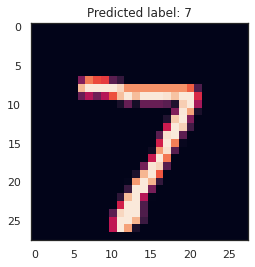

In [23]:
#예측값 시각화하기
arg_pred_y2 = np.argmax(pred_ys2, axis=1)

#matlotlib를 이용해서 시각화하기
plt.title(f'Predicted label: {arg_pred_y2[0]}')
plt.imshow(x_test[0])
plt.show()

In [24]:
# 위에서 학습시킨 model의 구조를 json 형식으로 model_json에 저장합니다.
model_json = model.to_json()

# json으로 저장한 모델을 읽어옵니다.
loaded_model = keras.models.model_from_json(model_json)

predictions = loaded_model.predict(x_test)
print(predictions.shape)
print(predictions[0])

# JSON 포맷은 모델 구조에 대한 정보만을 가지며, 가중치는 별도로 저장되지 않아, 다른 결과값을 보이는 것 같음.

(10000, 10)
[0.06954593 0.08814632 0.08235597 0.06896233 0.11742038 0.09668307
 0.10931599 0.12322536 0.15147997 0.0928647 ]


## 콜백 (Callbacks)
- 모델을 fit() 함수를 통해 학습시키는 동안 callbacks 매개변수를 사용하여 학습 시작이나 끝에 호출할 객체 리스트를 여러 개 지정할 수 있음
    - ModelCheckpoint, EarlyStopping, LearningRateScheduler, Tensorboard


In [25]:
from tensorflow.keras import callbacks

#### ModelCheckpoint
- tf.keras.callbacks.ModelCheckpoint: 정기적으로 모델의 체크포인트를 저장하고, 문제가 발생할 때 복구하는데 사용

In [26]:
check_point_cb = callbacks.ModelCheckpoint('keras_mnist_model.h5')
history = model.fit(x_train, y_train, epochs=10,
                    callbacks=[check_point_cb])

Epoch 1/10
1313/1313 [==============================] - 3s 2ms/step - loss: 0.0905 - accuracy: 0.9730
Epoch 2/10
1313/1313 [==============================] - 3s 2ms/step - loss: 0.0839 - accuracy: 0.9752
Epoch 3/10
1313/1313 [==============================] - 3s 2ms/step - loss: 0.0774 - accuracy: 0.9762
Epoch 4/10
1313/1313 [==============================] - 3s 2ms/step - loss: 0.0722 - accuracy: 0.9795
Epoch 5/10
1313/1313 [==============================] - 3s 2ms/step - loss: 0.0669 - accuracy: 0.9810
Epoch 6/10
1313/1313 [==============================] - 3s 2ms/step - loss: 0.0624 - accuracy: 0.9815
Epoch 7/10
1313/1313 [==============================] - 3s 2ms/step - loss: 0.0582 - accuracy: 0.9834
Epoch 8/10
1313/1313 [==============================] - 3s 2ms/step - loss: 0.0542 - accuracy: 0.9846
Epoch 9/10
1313/1313 [==============================] - 3s 2ms/step - loss: 0.0506 - accuracy: 0.9852
Epoch 10/10
1313/1313 [==============================] - 3s 2ms/step - loss: 0.047

- 최상의 모델만을 저장하는 옵션으로 save_best_only=True를 지정

In [27]:
check_point_cb = callbacks.ModelCheckpoint('keras_mnist_model.h5', save_best_only=True)
history = model.fit(x_train, y_train, epochs=10,
                    validation_data=(x_val, y_val),
                    callbacks=[check_point_cb])

Epoch 1/10
1313/1313 [==============================] - 4s 3ms/step - loss: 0.0436 - accuracy: 0.9880 - val_loss: 0.1466 - val_accuracy: 0.9560
Epoch 2/10
1313/1313 [==============================] - 4s 3ms/step - loss: 0.0406 - accuracy: 0.9888 - val_loss: 0.1055 - val_accuracy: 0.9691
Epoch 3/10
1313/1313 [==============================] - 4s 3ms/step - loss: 0.0374 - accuracy: 0.9900 - val_loss: 0.1051 - val_accuracy: 0.9692
Epoch 4/10
1313/1313 [==============================] - 4s 3ms/step - loss: 0.0349 - accuracy: 0.9907 - val_loss: 0.1043 - val_accuracy: 0.9703
Epoch 5/10
1313/1313 [==============================] - 4s 3ms/step - loss: 0.0326 - accuracy: 0.9914 - val_loss: 0.1026 - val_accuracy: 0.9710
Epoch 6/10
1313/1313 [==============================] - 4s 3ms/step - loss: 0.0301 - accuracy: 0.9922 - val_loss: 0.1023 - val_accuracy: 0.9701
Epoch 7/10
1313/1313 [==============================] - 4s 3ms/step - loss: 0.0281 - accuracy: 0.9928 - val_loss: 0.1026 - val_accuracy:

#### EarlyStopping
- tf.keras.callbacks.EarlyStopping: 검증 성능이 한동안 개선되지 않을 경우 학습을 중단할 때 사용
- 일정 patience 동안 검증 세트에 대한 점수가 오르지 않으면 학습을 멈춤
- 모델이 향상되지 않으면 학습이 자동으로 중지되므로, epochs 숫자를 크게 해도 무방
- 학습이 끝난 후의 최상의 가중치를 복원하기 때문에 모델을 따로 복원할 필요가 없음

In [28]:
check_point_cb = callbacks.ModelCheckpoint('keras_mnist_model.h5', save_best_only=True)
early_stopping_cb = callbacks.EarlyStopping(patience=3, monitor='val_loss',
                                  restore_best_weights=True)
history = model.fit(x_train, y_train, epochs=10,
                    validation_data=(x_val, y_val),
                    callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/10
1313/1313 [==============================] - 4s 3ms/step - loss: 0.0205 - accuracy: 0.9953 - val_loss: 0.1091 - val_accuracy: 0.9722
Epoch 2/10
1313/1313 [==============================] - 4s 3ms/step - loss: 0.0188 - accuracy: 0.9958 - val_loss: 0.1044 - val_accuracy: 0.9713
Epoch 3/10
1313/1313 [==============================] - 4s 3ms/step - loss: 0.0172 - accuracy: 0.9964 - val_loss: 0.1117 - val_accuracy: 0.9693
Epoch 4/10
1313/1313 [==============================] - 4s 3ms/step - loss: 0.0163 - accuracy: 0.9965 - val_loss: 0.1126 - val_accuracy: 0.9694
Epoch 5/10
1313/1313 [==============================] - 4s 3ms/step - loss: 0.0150 - accuracy: 0.9970 - val_loss: 0.1091 - val_accuracy: 0.9719


#### LearningRateScheduler
- tf.keras.callbacks.LearningRateSchduler: 최적화를 하는 동안 학습률(learning_rate)를 동적으로 변경할 때 사용

In [29]:
# 에폭 수가 10 미만일 경우는 학습률을 그대로 하고, 10 이상이 되면 -0.1%씩 감소시키는 코드
def scheduler(epoch, learning_rate):
    if epoch < 10:
        return learning_rate
    else:
        return learning_rate * tf.math.exp(-0.1)

In [30]:
round(model.optimizer.lr.numpy(), 5)

0.01

In [31]:
lr_scheduler_cb = callbacks.LearningRateScheduler(scheduler)

history = model.fit(x_train, y_train, epochs=15,
                    callbacks=[lr_scheduler_cb], verbose=0)

round(model.optimizer.lr.numpy(), 5)

0.00607

#### Tensorboard
- tf.keras.callbacks.TensorBoard: 모델의 경과를 모니터링할 때 사용
- 텐서보드를 이용하여 학습과정을 모니터링하기 위해서는 logs 폴더를 만들고, 학습이 진행되는 동안 로그 파일을 생성
- 아래와 같은 결과 확인 가능
![image.png](attachment:image.png)

In [32]:
log_dir = './logs'
tensor_board_cb = [callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1, write_graph=True, write_images=True)]
model.fit(x_train, y_train, batch_size=32, validation_data=(x_val, y_val),
          epochs=30, callbacks=tensor_board_cb)

Epoch 1/30
1313/1313 [==============================] - 4s 3ms/step - loss: 0.0052 - accuracy: 0.9997 - val_loss: 0.1137 - val_accuracy: 0.9725
Epoch 2/30
1313/1313 [==============================] - 4s 3ms/step - loss: 0.0050 - accuracy: 0.9997 - val_loss: 0.1150 - val_accuracy: 0.9724
Epoch 3/30
1313/1313 [==============================] - 4s 3ms/step - loss: 0.0048 - accuracy: 0.9998 - val_loss: 0.1155 - val_accuracy: 0.9729
Epoch 4/30
1313/1313 [==============================] - 4s 3ms/step - loss: 0.0046 - accuracy: 0.9999 - val_loss: 0.1149 - val_accuracy: 0.9731
Epoch 5/30
1313/1313 [==============================] - 4s 3ms/step - loss: 0.0045 - accuracy: 0.9998 - val_loss: 0.1168 - val_accuracy: 0.9724
Epoch 6/30
1313/1313 [==============================] - 4s 3ms/step - loss: 0.0043 - accuracy: 0.9999 - val_loss: 0.1164 - val_accuracy: 0.9724
Epoch 7/30
1313/1313 [==============================] - 4s 3ms/step - loss: 0.0042 - accuracy: 0.9998 - val_loss: 0.1177 - val_accuracy:

In [33]:
%load_ext tensorboard
%tensorboard --logdir {log_dir}